# 1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.Import Data set

In [2]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 3.Data Understanding

In [3]:
salary.shape

(30, 2)

In [4]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## 3.1. Assumptions check

### 3.1.1 Normality

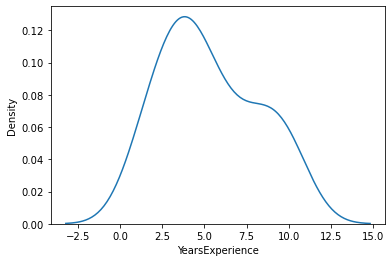

In [8]:
sns.distplot(salary.YearsExperience,hist=False)
plt.show()

### Normality check failed

## 3.1.2 Linearity check

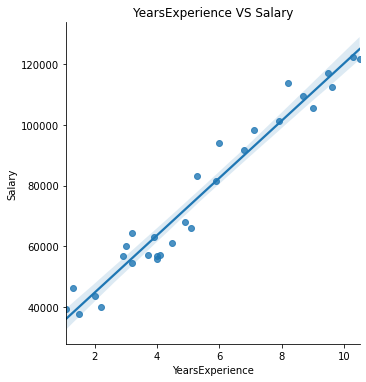

In [9]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary)
plt.title('YearsExperience VS Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

### Linearity test failed

### 3.1.3 No autoRegression

### Passed because no time date features

### 3.1.4 No Multicollinearity

### Passed because only one feature

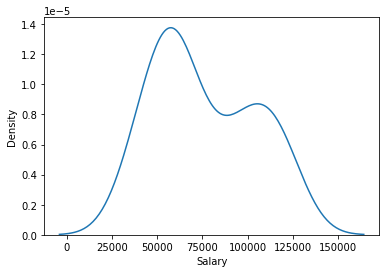

In [16]:
sns.distplot(salary.Salary,hist=False)
plt.show()

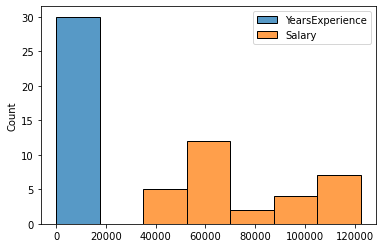

In [17]:
sns.histplot(salary)
plt.show()

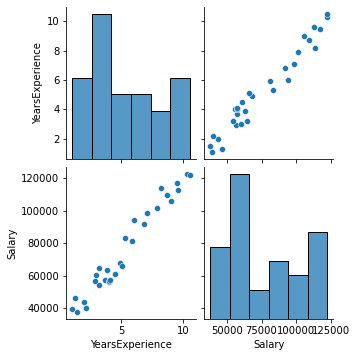

In [15]:
sns.pairplot(data=salary)
plt.show()

In [10]:
corr=salary.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

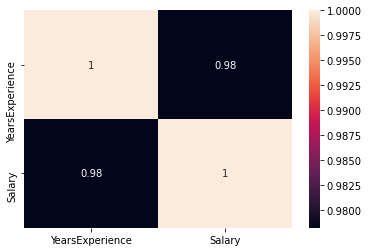

In [12]:
sns.heatmap(corr,annot=True)
plt.show

# 5.Model Building

In [128]:
X=salary.drop('Salary',axis=1)
y=salary['Salary']

In [129]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [132]:
import statsmodels.formula.api as smf

# 6.Model Training

In [138]:
linear_model=smf.ols('Salary~YearsExperience',data=salary).fit()

In [139]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [140]:
linear_model.pvalues,linear_model.tvalues

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64)

# 7.Model Testing

In [146]:
#manual caluculation
a=9449.962321*21+25792.200199
b=9449.962321*22+25792.200199
c=9449.962321*24+25792.200199
final=pd.Series([a,b,c])
final

0    224241.408940
1    233691.371261
2    252591.295903
dtype: float64

In [142]:
x=pd.DataFrame({'YearsExperience':[21,22,24]})

In [145]:
#automatic prediction
pred=linear_model.predict(x)
pred

0    224241.408949
1    233691.371271
2    252591.295914
dtype: float64